# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [3]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '/Users/brian/Desktop/The 3rd Machine Learning Marathon/Day_015'

In [4]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [5]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [8]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                   -0.002108
TARGET                        1.000000
NAME_CONTRACT_TYPE           -0.030896
FLAG_OWN_CAR                 -0.021851
FLAG_OWN_REALTY              -0.006148
                                ...   
AMT_REQ_CREDIT_BUREAU_WEEK    0.000788
AMT_REQ_CREDIT_BUREAU_MON    -0.012462
AMT_REQ_CREDIT_BUREAU_QRT    -0.002022
AMT_REQ_CREDIT_BUREAU_YEAR    0.019930
DAYS_EMPLOYED_ANOM                 NaN
Name: TARGET, Length: 110, dtype: float64

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [15]:
corr = app_train.corr()['TARGET']
corr.sort_values().head(10)

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64

In [16]:
corr.sort_values().tail(10)

REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
TARGET                         1.000000
DAYS_EMPLOYED_ANOM                  NaN
Name: TARGET, dtype: float64

Text(0, 0.5, 'EXT_SOURCE_3')

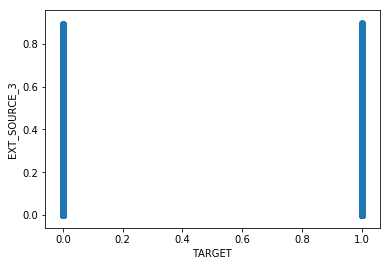

In [18]:
x = app_train['TARGET']
y = app_train['EXT_SOURCE_3']
plt.scatter(x, y)
plt.xlabel('TARGET')
plt.ylabel('EXT_SOURCE_3')

In [19]:
income_total_cor = app_train.corr()['AMT_INCOME_TOTAL']
income_total_cor

SK_ID_CURR                   -0.001820
TARGET                       -0.003982
NAME_CONTRACT_TYPE           -0.003531
FLAG_OWN_CAR                  0.083383
FLAG_OWN_REALTY               0.002934
                                ...   
AMT_REQ_CREDIT_BUREAU_WEEK    0.002387
AMT_REQ_CREDIT_BUREAU_MON     0.024700
AMT_REQ_CREDIT_BUREAU_QRT     0.004859
AMT_REQ_CREDIT_BUREAU_YEAR    0.011690
DAYS_EMPLOYED_ANOM                 NaN
Name: AMT_INCOME_TOTAL, Length: 110, dtype: float64

In [20]:
income_total_cor.sort_values().head(10)

OWN_CAR_AGE                   -0.117273
REGION_RATING_CLIENT_W_CITY   -0.091735
REGION_RATING_CLIENT          -0.085465
FLAG_DOCUMENT_6               -0.045878
EXT_SOURCE_3                  -0.030229
DAYS_BIRTH                    -0.027261
DAYS_LAST_PHONE_CHANGE        -0.018585
FLAG_WORK_PHONE               -0.017193
FLAG_DOCUMENT_3               -0.016751
DEF_30_CNT_SOCIAL_CIRCLE      -0.013244
Name: AMT_INCOME_TOTAL, dtype: float64

In [21]:
income_total_cor.sort_values().tail(10)

LIVINGAPARTMENTS_MEDI    0.104914
LIVINGAPARTMENTS_AVG     0.106920
FLOORSMIN_MODE           0.131800
FLOORSMIN_MEDI           0.138489
FLOORSMIN_AVG            0.139860
AMT_CREDIT               0.156870
AMT_GOODS_PRICE          0.159610
AMT_ANNUITY              0.191657
AMT_INCOME_TOTAL         1.000000
DAYS_EMPLOYED_ANOM            NaN
Name: AMT_INCOME_TOTAL, dtype: float64

In [22]:
# 用 AMT_CREDIT 與其他欄位之間的相關係數
credit_cor = app_train.corr()['AMT_CREDIT']
credit_cor

SK_ID_CURR                   -0.000343
TARGET                       -0.030369
NAME_CONTRACT_TYPE           -0.221648
FLAG_OWN_CAR                  0.116225
FLAG_OWN_REALTY              -0.039270
                                ...   
AMT_REQ_CREDIT_BUREAU_WEEK   -0.001275
AMT_REQ_CREDIT_BUREAU_MON     0.054451
AMT_REQ_CREDIT_BUREAU_QRT     0.015925
AMT_REQ_CREDIT_BUREAU_YEAR   -0.048448
DAYS_EMPLOYED_ANOM                 NaN
Name: AMT_CREDIT, Length: 110, dtype: float64

In [23]:
# 將這些相關係數由大到小排序，並列出前十名和後十名
print(credit_cor.sort_values().head(10))
print(credit_cor.sort_values().tail(10))

NAME_CONTRACT_TYPE            -0.221648
REGION_RATING_CLIENT_W_CITY   -0.110915
REGION_RATING_CLIENT          -0.101776
OWN_CAR_AGE                   -0.094191
DAYS_EMPLOYED                 -0.091295
DAYS_LAST_PHONE_CHANGE        -0.073701
AMT_REQ_CREDIT_BUREAU_YEAR    -0.048448
FLAG_DOCUMENT_6               -0.046717
FLAG_OWN_REALTY               -0.039270
TARGET                        -0.030369
Name: AMT_CREDIT, dtype: float64
FLOORSMAX_MEDI        0.102770
FLOORSMAX_AVG         0.103296
FLAG_OWN_CAR          0.116225
EXT_SOURCE_2          0.131228
AMT_INCOME_TOTAL      0.156870
EXT_SOURCE_1          0.168429
AMT_ANNUITY           0.770138
AMT_GOODS_PRICE       0.986968
AMT_CREDIT            1.000000
DAYS_EMPLOYED_ANOM         NaN
Name: AMT_CREDIT, dtype: float64


Text(0, 0.5, 'AMT_ANNUITY')

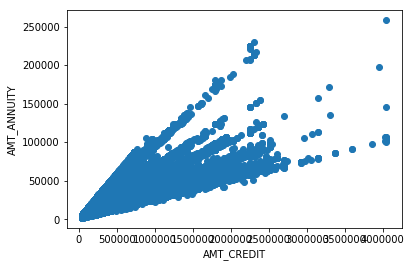

In [27]:
# 發現 AMT_ANNUITY 和 AMT_GOODS_PRICE 與 AMT_CREDIT 的相關係數很高，因此拿這三的變數做 scatter plot。
# 此區是 AMT_CREDIT 和 AMT_ANNUITY 之散佈圖。
x = app_train['AMT_CREDIT']
y = app_train['AMT_ANNUITY']
z = app_train['AMT_GOODS_PRICE']
plt.scatter(x, y)
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_ANNUITY')

Text(0, 0.5, 'AMT_GOODS_PRICE')

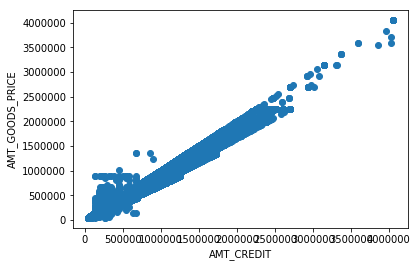

In [25]:
# 此區是 AMT_CREDIT 和 AMT_GOODS_PRICE 之散佈圖。
plt.scatter(x, z)
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_GOODS_PRICE')